In [ ]:
!nvidia-smi

Sat Mar 16 06:14:56 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np

In [ ]:
import tensorflow.keras.backend as K

In [ ]:
from keras import layers

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import IPython.display as disp

In [ ]:
print(tf.config.list_physical_devices())

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


# DATA


### Loading Head and Tail Separately

In [ ]:
orig_image_size = (600,450)
image_size=(360,270)
batch_size=None

def normalize_image(image, label):
    image=tf.cast(image, tf.float32)/255.0
    image=tf.image.resize(image,image_size)
    return image,label

def head_map(image, label):
    return image, tf.cond(tf.equal(label,0), lambda: tf.constant(5), lambda: tf.constant(0))

def middle_map(image, label):
    return image, tf.cond(tf.equal(label, 0), lambda: tf.constant(2),
                lambda: tf.cond(tf.equal(label, 1), lambda: tf.constant(4),
                lambda: tf.constant(0)))

def tail1_map(image, label):
    return image, tf.cond(tf.equal(label, 0), lambda: tf.constant(6),
                lambda: tf.cond(tf.equal(label, 1), lambda: tf.constant(3),
                lambda: tf.constant(0)))
def tail2_map(image, label):
    return image, tf.cond(tf.equal(label, 0), lambda: tf.constant(0),
                lambda: tf.cond(tf.equal(label, 1), lambda: tf.constant(1),
                lambda: tf.constant(0)))


class_names = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']
head_class = ['nv']
middle_class = ['bkl','mel']
tail_class_1 = ['vasc','df']
tail_class_2 = ['akiec' ,'bcc']

#for jupyter
#data_dir = "Dataset/KCDH2024_Training_Input_10K_Organized/"

#for colab
data_dir = "/content/drive/My Drive/KCDH2024_Training_Input_10K_Organized/KCDH2024_Training_Input_10K_Organized/"


head_data = keras.utils.image_dataset_from_directory( data_dir + "head/",
                                                    class_names=head_class,
                                                         image_size=image_size,
                                                   color_mode="rgb",
                                                   shuffle=True,
                                                     validation_split=0.1,
                                                     seed=0,
                                                     subset='training',
                                                    batch_size=batch_size)
head_datav = keras.utils.image_dataset_from_directory( data_dir + 'head/',
                                                    class_names=head_class,
                                                         image_size=image_size,
                                                   color_mode="rgb",
                                                   shuffle=True,
                                                     validation_split=0.1,
                                                     seed=0,
                                                     subset='validation',
                                                    batch_size=batch_size)


middle_data = keras.utils.image_dataset_from_directory( data_dir + 'middle/',
                                                    class_names=middle_class,
                                                         image_size=image_size,
                                                   color_mode="rgb",
                                                   shuffle=True,
                                                       validation_split=0.1,
                                                     seed=0,
                                                     subset='training',
                                                    batch_size=batch_size)
middle_datav = keras.utils.image_dataset_from_directory( data_dir + 'middle/',
                                                    class_names=middle_class,
                                                         image_size=image_size,
                                                   color_mode="rgb",
                                                   shuffle=True,
                                                       validation_split=0.1,
                                                     seed=0,
                                                     subset='validation',
                                                    batch_size=batch_size)

tail_data_1 = keras.utils.image_dataset_from_directory( data_dir + 'tail/tail_class_1',
                                                    class_names=tail_class_1,
                                                         image_size=image_size,
                                                   color_mode="rgb",
                                                   shuffle=True,
                                                     validation_split=0.1,
                                                     seed=0,
                                                     subset='training',
                                                    batch_size=batch_size)
tail_datav_1 = keras.utils.image_dataset_from_directory( data_dir + 'tail/tail_class_1',
                                                    class_names=tail_class_1,
                                                         image_size=image_size,
                                                   color_mode="rgb",
                                                   shuffle=True,
                                                     validation_split=0.1,
                                                     seed=0,
                                                     subset='validation',
                                                    batch_size=batch_size)
tail_data_2 = keras.utils.image_dataset_from_directory( data_dir + 'tail/tail_class_2',
                                                    class_names=tail_class_2,
                                                         image_size=image_size,
                                                   color_mode="rgb",
                                                   shuffle=True,
                                                     validation_split=0.1,
                                                     seed=0,
                                                     subset='training',
                                                    batch_size=batch_size)
tail_datav_2 = keras.utils.image_dataset_from_directory( data_dir + 'tail/tail_class_2',
                                                    class_names=tail_class_2,
                                                         image_size=image_size,
                                                   color_mode="rgb",
                                                   shuffle=True,
                                                     validation_split=0.1,
                                                     seed=0,
                                                     subset='validation',
                                                    batch_size=batch_size)

head_data=head_data.map(normalize_image).map(head_map)
middle_data=middle_data.map(normalize_image).map(middle_map)
tail_data_1=tail_data_1.map(normalize_image).map(tail1_map)
tail_data_2=tail_data_2.map(normalize_image).map(tail2_map)
head_datav=head_datav.map(normalize_image).map(head_map)
middle_datav=middle_datav.map(normalize_image).map(middle_map)
tail_datav_1=tail_datav_1.map(normalize_image).map(tail1_map)
tail_datav_2=tail_datav_2.map(normalize_image).map(tail2_map)

Found 6457 files belonging to 1 classes.
Using 5812 files for training.
Found 6457 files belonging to 1 classes.
Using 645 files for validation.


In [ ]:
data_hm = head_data.concatenate(middle_data)
data_hmv = head_datav.concatenate(middle_datav)

data_mt = middle_data.concatenate(tail_data)
data_mtv = middle_datav.concatenate(tail_datav)

dataset_train = data_hm.concatenate(tail_data)
dataset_valid = data_hmv.concatenate(tail_datav)
data_tail = tail_data_1.concatenate(tail_data_2)
data_tailv = tail_datav_1.concatenate(tail_datav_2)

### Data Augmentation

In [ ]:
def data_augmentation(img,label):
    img=layers.RandomFlip("horizontal_and_vertical")(img)
    img=layers.RandomRotation(1)(img)
    return img,label


### Count class frequency

In [ ]:
# train_freq = [0,0,0,0,0,0,0]
# valid_freq = [0,0,0,0,0,0,0]
# inverse_freq=[0,0,0,0,0,0,0]


# for img in dataset_train:
#     train_freq[img[1]] += 1

# for img in dataset_valid:
#     valid_freq[img[1]] += 1

# for i in range(7):
#     inverse_freq[i]=1./max(train_freq[i],1)

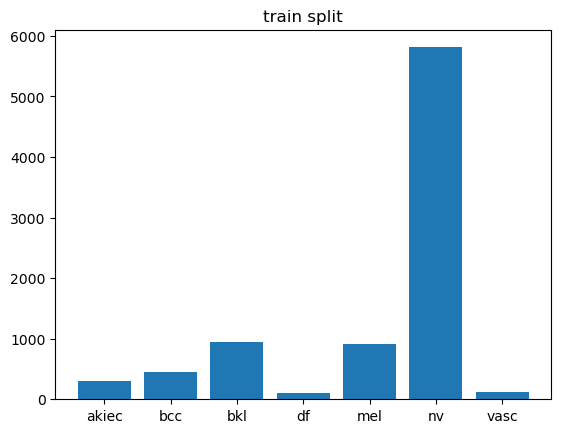

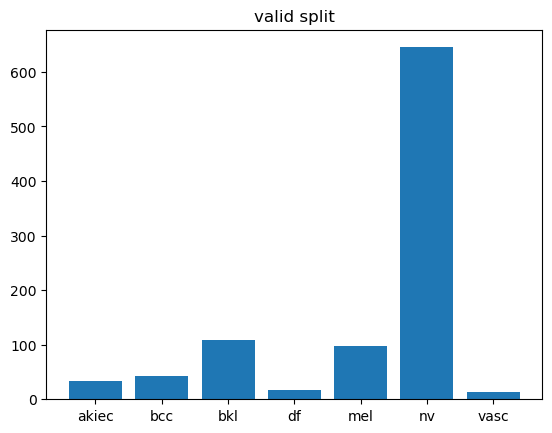

In [ ]:
# x=np.array(class_names)
# y=np.array(train_freq)

# plt.bar(x,y)
# plt.title("train split")
# plt.show()

# x=np.array(class_names)
# y=np.array(valid_freq)

# plt.bar(x,y)
# plt.title("valid split")
# plt.show()

### Data Pipeline

In [ ]:
# print(head_data)

In [ ]:
def shuffle_and_batch(dataset):
    #dataset = dataset.filter(lambda x, y: tf.size(x) > 0)
    return dataset.shuffle(5000).batch(16, drop_remainder=False)
data_tail = shuffle_and_batch(data_tail)
data_tailv = shuffle_and_batch(data_tailv)
dataset_train = shuffle_and_batch(dataset_train)
dataset_valid = shuffle_and_batch(dataset_valid)
head_data = shuffle_and_batch(head_data)
middle_data = shuffle_and_batch(middle_data)
tail_data_1 = shuffle_and_batch(tail_data_1)
tail_data_2 = shuffle_and_batch(tail_data_2)
head_datav = shuffle_and_batch(head_datav)
middle_datav = shuffle_and_batch(middle_datav)
tail_datav_1 = shuffle_and_batch(tail_datav_1)
tail_datav_2 = shuffle_and_batch(tail_datav_2)
data_hm = shuffle_and_batch(data_hm)
data_hmv = shuffle_and_batch(data_hmv)
data_mt = shuffle_and_batch(data_mt)
data_mtv = shuffle_and_batch(data_mtv)


In [ ]:
# print(tail_data)

<_BatchDataset element_spec=(TensorSpec(shape=(None, 360, 270, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


## Model

### Metrics

#### Balanced Accuracy Class

In [ ]:
class BalancedSparseCategoricalAccuracy(keras.metrics.Metric):

    def __init__(self, name='balanced_sparse_categorical_accuracy', **kwargs):
        super(BalancedSparseCategoricalAccuracy, self).__init__(**kwargs)

        self.correct_count = tf.Variable([0,0,0,0,0,0,0])
        self.total_count = tf.Variable([0,0,0,0,0,0,0])
        self.accuracy = 0.0
        self.quotient = tf.Variable([0.,0.,0.,0.,0.,0.,0.])

    def reset_state(self):
        self.correct_count = tf.Variable([0,0,0,0,0,0,0])
        self.total_count = tf.Variable([0,0,0,0,0,0,0])
        self.quotient = tf.Variable([0.,0.,0.,0.,0.,0.,0.])
        self.accuracy = 0.0

    def update_state(self, y_true, y_pred, sample_weight=None):
        pred_idx = tf.argmax(y_pred, axis=1, output_type=tf.int32)
        y_true=tf.reshape(y_true, tf.shape(pred_idx))
        y_true=tf.cast(y_true,tf.int32)

        def count_all(y_true):
            return tf.cast([ tf.reduce_sum(tf.cast(tf.equal(y_true,i),tf.float32)) for i in range(0,7)],tf.int32)

        def count_match(y_true, y_pred):
             return tf.cast([ tf.reduce_sum(tf.cast(tf.equal(y_true,i)&tf.equal(y_true,pred_idx),tf.float32)) for i in range(0,7) ],tf.int32)


        total_counts = count_all(y_true)
        tf.compat.v1.assign_add(self.total_count, total_counts)

        correct_counts = count_match(y_true, y_pred)
        tf.compat.v1.assign_add(self.correct_count, correct_counts)
        self.quotient = tf.cast(self.correct_count/tf.maximum(self.total_count,tf.constant(1)), tf.float32)
        print(self.quotient)
        self.accuracy = tf.reduce_mean(self.correct_count/tf.maximum(self.total_count,1))
        return self.accuracy

    def result(self):
        self.accuracy = tf.reduce_mean(self.correct_count/tf.maximum(self.total_count,1))
        self.accuracy = tf.reduce_sum(tf.reduce_sum(self.quotient) / tf.cast(tf.math.count_nonzero(self.total_count),tf.float32))
        return self.accuracy


In [ ]:
# m = BalancedSparseCategoricalAccuracy()
# m.update_state([[0]],[[0.9,0.1,0.,0.,0.,0.,0.]])
# m.result()

tf.Tensor([1. 0. 0. 0. 0. 0. 0.], shape=(7,), dtype=float32)


<tf.Tensor: shape=(), dtype=float32, numpy=1.0>

### Loss

#### Focal Loss Parameter

In [ ]:
def FocalLoss(y_true, y_pred):
    y_true_oh = tf.cast(tf.one_hot(y_true, depth=7),tf.float32)
    y_true_oh = tf.reshape(y_true_oh, tf.shape(y_pred))
    p = tf.reduce_sum(y_true_oh * y_pred,axis=1)
    return tf.math.reduce_sum(tf.constant(-1.0)*tf.math.pow((1-p), tf.constant(2.0))*tf.math.log(tf.maximum(p,tf.constant(1e-12))))

In [ ]:
# y_true = tf.constant([[1],[0]])
# y_pred = tf.constant([[0.1, 0.001, 0.3, 0.4, 0.5, 0.6, 0.7],
#                        [0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4]])
# y_true_oh=tf.cast(tf.one_hot(y_true, depth=7),tf.float32)
# FocalLoss(y_true, y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=6.902873>

### Model Architecture

In [ ]:
vgg = tf.keras.applications.vgg16.VGG16(include_top = False,
                                       input_shape=(360,270,3),
                                       )
vgg.trainable=False

In [ ]:
# vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 360, 270, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 360, 270, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 360, 270, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 180, 135, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 180, 135, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 180, 135, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 90, 67, 128)       0     

In [ ]:
model = keras.Sequential([
    layers.RandomRotation(1,input_shape=(360,270,3), fill_mode='nearest'),
    layers.RandomFlip('horizontal_and_vertical'),
    layers.RandomTranslation(0.01, 0.01, fill_mode='nearest'),
    layers.RandomZoom(0.1, fill_mode='nearest'),
    layers.RandomContrast(0.2),
    vgg,
    layers.MaxPool2D(),
    layers.MaxPool2D(),
    layers.Conv2D(256, (2,2), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='linear'),
    layers.LeakyReLU(0.01),
    layers.Dropout(0.2),
    layers.Dense(64, activation='linear'),
    layers.LeakyReLU(0.01),
    layers.Dropout(0.2),
    layers.Dense(7, activation='softmax'),
])

model.build()

In [ ]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_rotation_1 (RandomR  (None, 360, 270, 3)       0         
 otation)                                                        
                                                                 
 random_flip_1 (RandomFlip)  (None, 360, 270, 3)       0         
                                                                 
 random_translation_1 (Rand  (None, 360, 270, 3)       0         
 omTranslation)                                                  
                                                                 
 random_zoom_1 (RandomZoom)  (None, 360, 270, 3)       0         
                                                                 
 random_contrast_1 (RandomC  (None, 360, 270, 3)       0         
 ontrast)                                                        
                                                      

In [ ]:
file_path = "/content/drive/My Drive/AI ML GC/transferlearning3.keras"
print(file_path)


/content/drive/My Drive/AI ML GC/transferlearning3.keras


In [ ]:
import os

# List files in the directory
directory = "/content/drive/My Drive/AI ML GC/"
print(os.listdir(directory))


['KCDH2024_Training_Input_10K_Organized.zip', 'transferlearning3.keras']


In [ ]:
model = keras.models.load_model("/content/drive/My Drive/AI ML GC/transferlearning3.keras", custom_objects={"BalancedSparseCategoricalAccuracy" : BalancedSparseCategoricalAccuracy()}, compile=False)

In [ ]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_rotation_1 (RandomR  (None, 360, 270, 3)       0         
 otation)                                                        
                                                                 
 random_flip_1 (RandomFlip)  (None, 360, 270, 3)       0         
                                                                 
 random_translation_1 (Rand  (None, 360, 270, 3)       0         
 omTranslation)                                                  
                                                                 
 random_zoom_1 (RandomZoom)  (None, 360, 270, 3)       0         
                                                                 
 random_contrast_1 (RandomC  (None, 360, 270, 3)       0         
 ontrast)                                                        
                                                      

### Model Training

In [ ]:
metric = BalancedSparseCategoricalAccuracy()

model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss = FocalLoss,
    metrics = [metric, 'accuracy']
)

In [ ]:
# Early stopping to stop training when loss stops to decrease
es = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.1, patience = 10)

In [ ]:
total_history = []

In [ ]:
history = model.fit(head_data,
                         epochs=10,
                         shuffle=True,
                         validation_data=head_datav,
                         callbacks = [es],
                        )


total_history.append(history)


Epoch 1/10
Tensor("Cast_17:0", shape=(7,), dtype=float32)
Tensor("Cast_17:0", shape=(7,), dtype=float32)
364/364 [==============================] - ETA: 0s - loss: 3.2771 - balanced_sparse_categorical_accuracy_1: 0.8981 - accuracy: 0.8981Tensor("Cast_17:0", shape=(7,), dtype=float32)


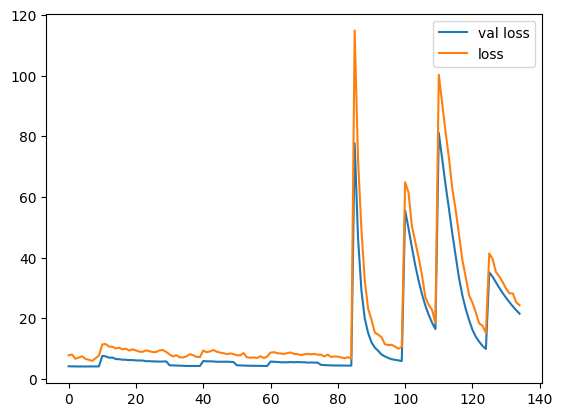

In [ ]:
y1=[]
y2=[]

for hist in total_history:
  y2.extend(hist.history['loss'])
  y1.extend(hist.history['val_loss'])

plt.plot(y1)
plt.plot(y2)
plt.legend(['val loss', 'loss'])
plt.show()

In [ ]:
#model.save("/content/drive/My Drive/transferlearning_tail1.keras")

## Model Testing

In [ ]:
predictions=model.predict(tail_datav_1)

1/1 [==============================] - 0s 386ms/step


In [ ]:
print(predictions)

In [ ]:
model.evaluate(tail_datav_2)

3/3 [==============================] - 2s 250ms/step - loss: 15.9133 - balanced_sparse_categorical_accuracy_8: nan - accuracy: 0.5732


[15.913338661193848, nan, 0.5731707215309143]

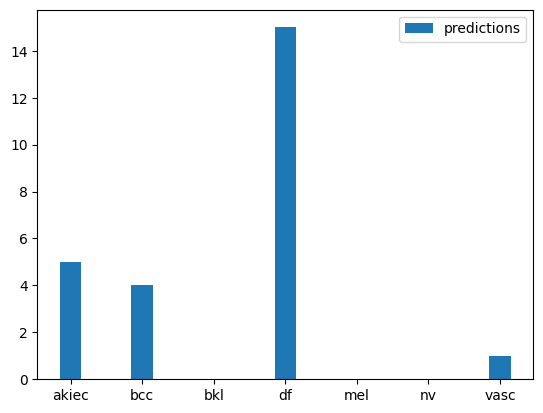

In [ ]:
predictions=np.asarray(predictions)
class_pred=[]
for i in predictions:
    class_pred.append(tf.math.argmax(i))
class_pred=np.asarray(class_pred)


count=[0,0,0,0,0,0,0]
for i in class_pred:
    count[i] += 1

X_Axis=np.arange(len(class_names))
plt.xticks(X_Axis,class_names)
width=0.3

plt.bar(X_Axis, count, width, label="predictions")
#plt.bar(X_Axis+width, valid_freq, width, label="ground truth")
plt.legend()
plt.show()

In [ ]:
grd_truth=[]

for batch in tail_datav:
    val=np.asarray(batch[1])
    grd_truth.extend(val)

class_acc=[0,0,0,0,0,0,0]
class_cnt = [0,0,0,0,0,0,0]

for i,j in zip(class_pred,grd_truth):
    if(i==j):
        class_acc[j] += 1.
    class_cnt[j] += 1
for i in range(7):
  class_acc[i] /= max(class_cnt[i],1)
print("class wise accuracy: ", class_names,class_acc)

accuracy=(sum(class_acc)/4)

print("Balanced Accuracy=",accuracy)

class wise accuracy:  ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc'] [0.24242424242424243, 0.627906976744186, 0.0, 0.0, 0.0, 0.0, 0.07142857142857142]
Balanced Accuracy= 0.23543994764924997


In [ ]:
acc = BalancedSparseCategoricalAccuracy()
acc.update_state(grd_truth, predictions)
acc.result()

tf.Tensor(
[0.24242425 0.627907   0.         0.         0.         0.
 0.07142857], shape=(7,), dtype=float32)


<tf.Tensor: shape=(), dtype=float32, numpy=0.23543996>

In [ ]:
count=[0,0,0,0,0,0,0]
total=0
for i in range(len(grd_truth)):
  if(grd_truth[i] == 6):
    total += 1
    count[class_pred[i]] += 1

for i in range(7):
  count[i] /= total

print(count)

[0.0, 0.9285714285714286, 0.0, 0.0, 0.0, 0.0, 0.07142857142857142]
